## Импорт библиотек

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [227]:
np.random.seed(0)
random_state = 123
sns.set_style("ticks", {'axes.grid' : False})

In [228]:
x1 = np.random.normal(loc=0.0, scale=1.0, size=1000)
x2 = np.random.normal(loc=0.0, scale=1.0, size=1000)

x1 = np.random.lognormal(mean=0.0, sigma=0.8, size=1000)
x2 = np.random.lognormal(mean=0.0, sigma=0.8, size=1000)

y = x1 + x2

## Создание датафрейма

In [229]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df.sample()

,x1,x2,y
671,3.200249,0.440889,3.641138


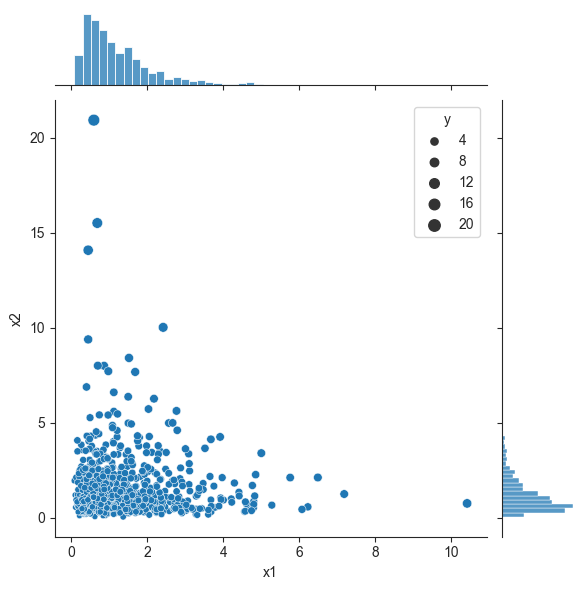

In [250]:
sns.jointplot(x=df['x1'], y=df['x2'], size=df['y']);

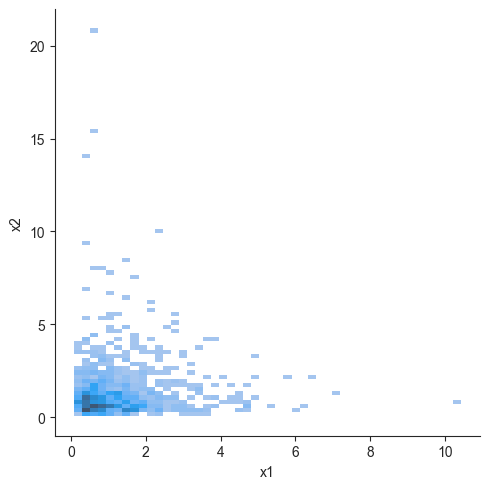

In [256]:
sns.displot(x=df['x1'], y=df['x2']);

In [231]:
x = df[['x1', 'x2']]
y = df['y']

In [232]:
x_log = pd.concat([np.log(df['x1']+1.1*abs(df['x1'].min())), np.log(df['x2']+1.1*abs(df['x2'].min()))], axis=1);

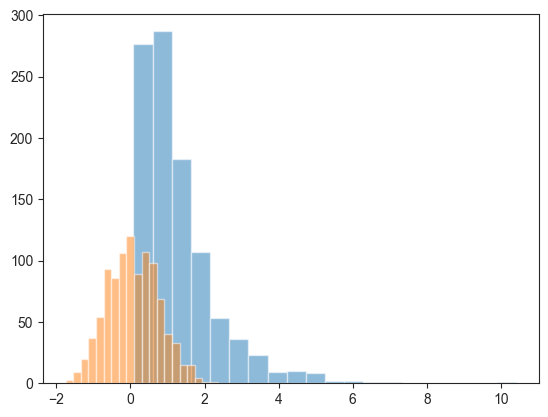

In [245]:
plt.hist(x['x1'], bins=20, alpha=0.5);
plt.hist(x_log['x1'], bins=20, alpha=0.5);

## Обучение модели

In [234]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
x_train_log, x_test_log, y_train, y_test = train_test_split(x_log, y, test_size=0.2, random_state=random_state)

In [235]:
x_train

,x1,x2
512,0.785939,0.429657
685,1.795054,0.390684
997,0.857338,0.975839
927,0.718511,0.302302
376,0.677278,0.481464
...,...,...
988,0.588750,1.089127
322,0.211239,2.487253
382,0.641911,3.358000
365,0.311252,0.505351


In [236]:
y_train

512    1.215596
685    2.185738
997    1.833176
927    1.020813
376    1.158742
         ...   
988    1.677877
322    2.698492
382    3.999912
365    0.816603
510    1.831796
Name: y, Length: 800, dtype: float64

In [237]:
lr =LinearRegression()
lr.fit(x_train, y_train);
lr_pred = lr.predict(x_test);
print(mae(y_test, lr_pred))

5.628830734849544e-16


In [238]:
lr =LinearRegression()
lr.fit(x_train_log, y_train);
lr_pred = lr.predict(x_test_log);
print(mae(y_test, lr_pred))

0.5965124239780437


In [239]:
x_train_log

,x1,x2
512,-0.131450,-0.723898
685,0.634425,-0.807694
997,-0.053167,0.030568
927,-0.211468,-1.028611
376,-0.263755,-0.622381
...,...,...
988,-0.386201,0.134818
322,-1.196922,0.933130
382,-0.310889,1.227651
365,-0.910966,-0.578834
